In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, n_steps], series[9000:, -1]

In [ ]:
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 409us/step - loss: 0.1415
Epoch 2/20
219/219 [==============================] - 0s 414us/step - loss: 0.0362
Epoch 3/20
219/219 [==============================] - 0s 416us/step - loss: 0.0187
Epoch 4/20
219/219 [==============================] - 0s 412us/step - loss: 0.0124
Epoch 5/20
219/219 [==============================] - 0s 412us/step - loss: 0.0103
Epoch 6/20
219/219 [==============================] - 0s 455us/step - loss: 0.0089
Epoch 7/20
219/219 [==============================] - 0s 628us/step - loss: 0.0078
Epoch 8/20
219/219 [==============================] - 0s 428us/step - loss: 0.0069
Epoch 9/20
219/219 [==============================] - 0s 481us/step - loss: 0.0064
Epoch 10/20
219/219 [==============================] - 0s 430us/step - loss: 0.0060
Epoch 11/20
219/219 [==============================] - 0s 421us/step - loss: 0.0055
Epoch 12/20
219/219 [==============================] - 0s 412us/step - loss: 0.0052
E

In [ ]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 486us/step - loss: 0.0039


0.003887005615979433

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2649
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1216
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0733
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0592
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0506
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0431
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0385
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0350
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0308
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0288
Epoch 11/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0259
Epoch 12/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0238
Epoch 13/20
219/219 [====

In [ ]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0140


0.013981986790895462

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 10ms/step - loss: 0.1098
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0078
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0058
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0045
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0040
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0039
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0036
Epoch 11/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0034
Epoch 12/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0032
Epoch 13/20
2

In [ ]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0029


0.002926837420091033

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0334
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0050
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0034
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0028
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 13/20
219/219 [====

In [ ]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0030


0.0029832404106855392

In [ ]:
series = generate_time_series(1, n_steps + 10)
series.shape

(1, 60, 1)

In [ ]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
model.predict(x_new).shape

(1, 1)

In [ ]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
y_pred = x[:, n_steps:]

In [ ]:
y_pred.shape

(1, 10, 1)

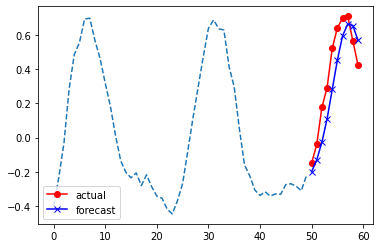

In [ ]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [ ]:
series = generate_time_series(10000, n_steps + 10)

In [ ]:
series.shape

(10000, 60, 1)

In [ ]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.1241
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0254
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0181
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0154
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0137
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0124
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0118
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0116
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0109
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 11/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0100
Epoch 13/20
219/219 [====

In [ ]:
y_pred = model.predict(x_new)

In [ ]:
y_pred = y_pred[..., np.newaxis]
y_pred.shape

(1, 10, 1)

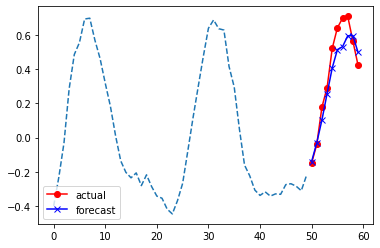

In [ ]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [ ]:
y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [ ]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.0696 - last_time_step_mse: 0.0604 - val_loss: 0.0406 - val_last_time_step_mse: 0.0290
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0359 - last_time_step_mse: 0.0239 - val_loss: 0.0316 - val_last_time_step_mse: 0.0215
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0304 - last_time_step_mse: 0.0177 - val_loss: 0.0278 - val_last_time_step_mse: 0.0147
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0282 - last_time_step_mse: 0.0148 - val_loss: 0.0268 - val_last_time_step_mse: 0.0143
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0251 - last_time_step_mse: 0.0121 - val_loss: 0.0249 - val_last_time_step_mse: 0.0126
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0243 - last_time_step_mse: 0.0118 - val_loss: 0.0211 - val_last_time_step_mse: 0.0079
Epoch 7/20
219/219 [=======

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [ ]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, 
                    input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, 
                     input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [ ]:
x_train.shape

(7000, 50, 1)

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 7s 22ms/step - loss: 0.0626 - last_time_step_mse: 0.0541 - val_loss: 0.0340 - val_last_time_step_mse: 0.0217
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0308 - last_time_step_mse: 0.0179 - val_loss: 0.0247 - val_last_time_step_mse: 0.0114
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0231 - last_time_step_mse: 0.0091 - val_loss: 0.0196 - val_last_time_step_mse: 0.0067
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0192 - last_time_step_mse: 0.0061 - val_loss: 0.0183 - val_last_time_step_mse: 0.0063
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0176 - last_time_step_mse: 0.0055 - val_loss: 0.0169 - val_last_time_step_mse: 0.0049
Epoch 6/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0168 - last_time_step_mse: 0.0050 - val_loss: 0.0169 - val_last_time_step_mse: 0.0051
Epoch 7/20
219/219 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'last_time_step_mse', 'val_loss', 'val_last_time_step_mse'])

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0140 - last_time_step_mse: 0.0034


[0.014039264991879463, 0.0033989588264375925]

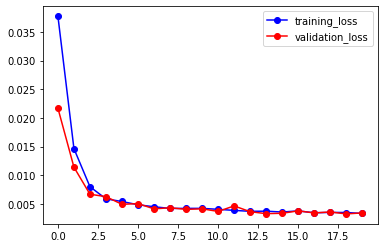

In [ ]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding='valid',
                       input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 20)          100       
_________________________________________________________________
gru (GRU)                    (None, None, 20)          2520      
_________________________________________________________________
gru_1 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [ ]:
history = model.fit(x_train, y_train[:, 3::2], epochs=20, validation_data=(x_valid, y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 5s 13ms/step - loss: 0.0576 - last_time_step_mse: 0.0514 - val_loss: 0.0240 - val_last_time_step_mse: 0.0148
Epoch 2/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0228 - last_time_step_mse: 0.0121 - val_loss: 0.0173 - val_last_time_step_mse: 0.0068
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0170 - last_time_step_mse: 0.0062 - val_loss: 0.0148 - val_last_time_step_mse: 0.0050
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0150 - last_time_step_mse: 0.0053 - val_loss: 0.0137 - val_last_time_step_mse: 0.0041
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0140 - last_time_step_mse: 0.0046 - val_loss: 0.0138 - val_last_time_step_mse: 0.0049
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0134 - last_time_step_mse: 0.0046 - val_loss: 0.0130 - val_last_time_step_mse: 0.0044
Epoch 7/20
219/219 [==

In [ ]:
model.evaluate(x_test, y_test[:, 3::2])

32/32 [==============================] - 0s 2ms/step - loss: 0.0114 - last_time_step_mse: 0.0042


[0.011416233144700527, 0.004248199053108692]

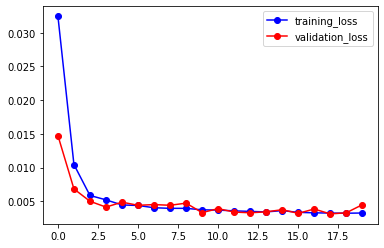

In [ ]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal',
                                 activation='relu', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.0700 - last_time_step_mse: 0.0611 - val_loss: 0.0275 - val_last_time_step_mse: 0.0161
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0269 - last_time_step_mse: 0.0155 - val_loss: 0.0249 - val_last_time_step_mse: 0.0139
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0243 - last_time_step_mse: 0.0131 - val_loss: 0.0221 - val_last_time_step_mse: 0.0108
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0226 - last_time_step_mse: 0.0113 - val_loss: 0.0209 - val_last_time_step_mse: 0.0097
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0214 - last_time_step_mse: 0.0103 - val_loss: 0.0202 - val_last_time_step_mse: 0.0087
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0197 - last_time_step_mse: 0.0084 - val_loss: 0.0189 - val_last_time_step_mse: 0.0076
Epoch 7/20
219/219 [========

In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0160 - last_time_step_mse: 0.0051


[0.016047779470682144, 0.005101033020764589]

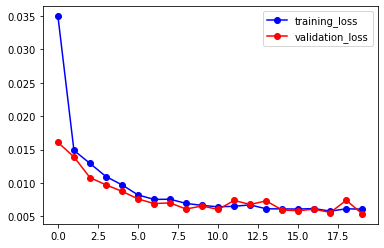

In [ ]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

# 연습문제 9번 SketchRNN 데이터셋으로 분류모델

In [238]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [239]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [240]:
from pathlib import Path

In [241]:
filepath

'C:\\Users\\sinjy\\.keras\\datasets/quickdraw\\quickdraw_tutorial_dataset_v1.tar.gz'

In [242]:
quickdraw_dir = Path(filepath).parent
quickdraw_dir

WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw')

In [243]:
list(quickdraw_dir.glob("*"))

[WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord.classes'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quick

In [244]:
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [245]:
train_files

['C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00000-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00001-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00002-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00003-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00004-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00005-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00006-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00007-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00008-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00009-of-00010']

In [246]:
eval_files

['C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00000-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00001-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00002-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00003-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00004-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00005-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00006-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00007-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00008-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00009-of-00010']

In [247]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [248]:
len(train_classes)

345

In [249]:
train_classes == test_classes

True

In [250]:
train_classes

['garden hose\n',
 'lighter\n',
 'penguin\n',
 'tractor\n',
 'sheep\n',
 'skateboard\n',
 'mountain\n',
 'mouse\n',
 'chandelier\n',
 'guitar\n',
 'roller coaster\n',
 'owl\n',
 'toilet\n',
 'map\n',
 'snail\n',
 'yoga\n',
 'spoon\n',
 'camera\n',
 'telephone\n',
 'bench\n',
 'pig\n',
 'lion\n',
 'skull\n',
 'hand\n',
 'raccoon\n',
 'beard\n',
 'church\n',
 'animal migration\n',
 'whale\n',
 'sun\n',
 'washing machine\n',
 'airplane\n',
 'megaphone\n',
 'sleeping bag\n',
 'jail\n',
 'fire hydrant\n',
 'car\n',
 'barn\n',
 'swing set\n',
 'rake\n',
 'paintbrush\n',
 'van\n',
 'dragon\n',
 'sailboat\n',
 'compass\n',
 'duck\n',
 'hat\n',
 'kangaroo\n',
 'donut\n',
 'crocodile\n',
 'coffee cup\n',
 'cooler\n',
 'waterslide\n',
 'feather\n',
 'firetruck\n',
 'stereo\n',
 'leg\n',
 'tree\n',
 'pillow\n',
 'purse\n',
 'hourglass\n',
 'ear\n',
 'broccoli\n',
 'goatee\n',
 'moon\n',
 'bridge\n',
 'peas\n',
 'squiggle\n',
 'foot\n',
 'camouflage\n',
 'string bean\n',
 'pants\n',
 'lipstick\n',


In [251]:
class_names = [name.strip().lower() for name in train_classes]

In [252]:
len(class_names)

345

In [253]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    print(examples["ink"].values)
    flat_sketches = tf.sparse.to_dense(examples['ink'])
    print(flat_sketches)
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    print(sketches)
    lengths = examples['shape'][:, 0]
    labels = examples['class_index'][:, 0]
    return sketches, lengths, labels

In [254]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                     n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths, 
                                      num_parallel_reads=n_read_threads)
    
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [255]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

Tensor("ParseExample/ParseExampleV2:1", shape=(None,), dtype=float32)
Tensor("SparseToDense:0", shape=(None, None), dtype=float32)
Tensor("Reshape:0", shape=(None, None, 3), dtype=float32)
Tensor("ParseExample/ParseExampleV2:1", shape=(None,), dtype=float32)
Tensor("SparseToDense:0", shape=(None, None), dtype=float32)
Tensor("Reshape:0", shape=(None, None, 3), dtype=float32)
Tensor("ParseExample/ParseExampleV2:1", shape=(None,), dtype=float32)
Tensor("SparseToDense:0", shape=(None, None), dtype=float32)
Tensor("Reshape:0", shape=(None, None, 3), dtype=float32)


In [262]:
sketch, length, label = None, None, None
for sketches, lengths, labels in valid_set.take(1):
#     print(i)
    sketch = sketches[0]
    length = lengths[0]
    label = labels[0]

In [264]:
origin = np.zeros((3), dtype='float32')[np.newaxis, :]
sketch_ = np.r_[origin, sketch]
stroke_end_indices = np.argwhere(sketch_[:, -1] == 1.)[:, 0]
coordinates = np.cumsum(sketch[:, :2], axis=0)
strokes = np.split(coordinates, stroke_end_indices + 1)

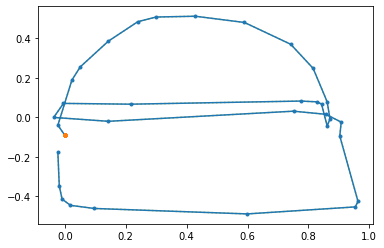

In [265]:
import matplotlib.pyplot as plt
plt.plot(coordinates[:, 0], - coordinates[:, 1], "y:")
for stroke in strokes:
    plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
plt.show()

In [266]:
class_names[label.numpy()]

'cooler'

In [267]:
[lengths for _, lengths, _ in train_set.take(100)]

[<tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([47, 28, 59, 29, 49, 34, 16, 25, 44, 28, 70, 16, 25, 33, 41, 32, 55,
        66, 39, 65, 36, 21, 25, 30, 32, 88, 70, 29, 27, 36, 67, 68],
       dtype=int64)>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([ 91,  30,  46,  11,  23,  45,  30,   6,  27,  51,  56,  69,  35,
         40,  50,  55,  41,  60,  73,  48,  19, 103,  35,  14,  20,  43,
          7,  52,  27,  32,  35, 110], dtype=int64)>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([93, 37, 31, 87, 77, 18, 14, 66, 72, 28, 44, 17, 38, 72, 44, 31, 29,
        55, 15, 20, 12, 11, 58, 24, 35, 31, 63, 47, 40, 31, 39, 23],
       dtype=int64)>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([ 46,  11,  35,  30,  90,  34,  33,  19,  54,  29,  16,  47,  24,
         52,  77,  35,  35,  47,  61,  54,  38,  61,  52,  47,  50,  19,
         49,  83,  33,  37, 129,  31], dtype=int64)>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([ 50,  26,  60,  45,  56,  84

In [268]:
np.concatenate([lengths for _, lengths, _ in train_set.take(100)]).shape

(3200,)

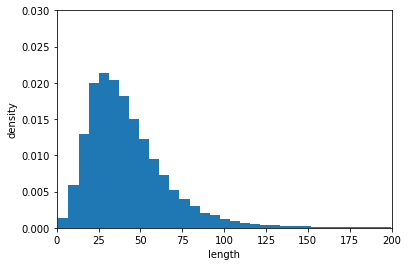

In [269]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [270]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [274]:
for i in cropped_train_set.take(5m):
    print(i)

(<tf.Tensor: shape=(32, 95, 3), dtype=float32, numpy=
array([[[ 0.18110235, -0.06282723,  0.        ],
        [ 0.20472443,  0.        ,  0.        ],
        [ 0.07086611,  0.026178  ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.06692913, -0.05940595,  0.        ],
        [ 0.1023622 , -0.01980197,  0.        ],
        [ 0.        ,  0.32673267,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.08974355,  0.        ,  0.        ],
        [-0.22435898, -0.03529412,  0.        ],
        [-0.15384617,  0.00392157,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

      

In [ ]:
x, y = None, None
for x, y in cropped_train_set.take(1):
    x = x
    y = y

In [ ]:
x.shape

TensorShape([32, 100, 3])

In [ ]:
log_dir = Path("C:/Users/sinjy/jupyter_notebook/my_logs")
log_dir_lstm = log_dir / "lstm"
log_dir_lstm.mkdir(exist_ok=True)

In [ ]:
from functools import partial

## lstm model

In [ ]:
LSTM = partial(keras.layers.LSTM, return_sequences=True)

model = keras.models.Sequential([
    LSTM(20, input_shape=[None, 3]),
    LSTM(20),
    LSTM(20, return_sequences=False),
    keras.layers.Dense(345, activation='softmax')
])

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])
model.fit(cropped_train_set, epochs=1, 
          callbacks=[keras.callbacks.TensorBoard(log_dir_lstm, 
                                                 update_freq='batch')], 
         validation_data=cropped_valid_set)

107813/107813 [==============================] - 5286s 49ms/step - loss: 4.6307 - accuracy: 0.1013 - sparse_top_k_categorical_accuracy: 0.2463 - val_loss: 2.9249 - val_accuracy: 0.3418 - val_sparse_top_k_categorical_accuracy: 0.6267


## lstm variety: peephole connection

In [ ]:
log_dir = Path("C:/Users/sinjy/jupyter_notebook/my_logs")
log_dir_peephole = log_dir / "peephole"
log_dir_peephole.mkdir(exist_ok=True)

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.experimental.PeepholeLSTMCell(20), 
                     return_sequences=True, input_shape=[None, 3]),
    keras.layers.RNN(keras.experimental.PeepholeLSTMCell(20), 
                     return_sequences=True),
    keras.layers.RNN(keras.experimental.PeepholeLSTMCell(20),
                    return_sequences=False),
    keras.layers.Dense(345, activation='softmax')
])

C:\Users\sinjy\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:2560: UserWarning: `tf.keras.experimental.PeepholeLSTMCell` is deprecated and will be removed in a future version. Please use tensorflow_addons.rnn.PeepholeLSTMCell instead.
  warnings.warn('`tf.keras.experimental.PeepholeLSTMCell` is deprecated '


# 연습문제 10번

## data load

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from pathlib import Path

In [2]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/datasets/jsb_chorales/"
FILENAME = "jsb_chorales.tgz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT+FILENAME, 
                              cache_subdir="datasets/jsb_chorales",
                              extract=True)

In [3]:
chorales_dir = Path(filepath).parent

In [4]:
train_dir = chorales_dir / "train"
valid_dir = chorales_dir / "valid"
test_dir = chorales_dir / "test"

In [5]:
train_dir_lst = list(map(lambda x: str(x), list(train_dir.glob("*"))))
valid_dir_lst = list(map(lambda x: str(x), list(valid_dir.glob("*"))))
test_dir_lst = list(map(lambda x: str(x), list(test_dir.glob("*"))))

In [6]:
import pandas as pd

def dir_to_lstdata(dir_lst):
    data = []
    for i in range(len(dir_lst)):
        csv_data = pd.read_csv(dir_lst[i])
        data += [csv_data.values.tolist()]
    return data

train_data = dir_to_lstdata(train_dir_lst)
valid_data = dir_to_lstdata(valid_dir_lst)
test_data = dir_to_lstdata(test_dir_lst)

In [7]:
notes = set()

for data in (train_data, valid_data, test_data):
    for sample in data:
        for time in sample:
            notes |= set(time)

In [8]:
n_notes = len(notes)
min_notes = min(notes - {0})
max_notes = max(notes)
n_notes, min_notes, max_notes

(47, 36, 81)

## my pipeline 1 ( shift and one hot )

In [17]:
class Pipeline1:
    def __init__(self, n_notes, min_notes):
        self.n_notes = n_notes
        self.min_notes = min_notes
        
    def shift(self, sample):
        return tf.where(sample == 0, 0, sample - self.min_notes + 1)
    
    def one_hot(self, batch_x): 
        return tf.one_hot(batch_x, self.n_notes)
    
    def xysplit(self, batch):
        batch = tf.map_fn(self.shift, batch)
        x, y = self.one_hot(batch[:, :-1]).to_tensor(), batch[:, -1:].to_tensor()
        x.set_shape([None, None, 4, 47])
        y.set_shape([None, 1, 4])
        return x, y
    
    def __call__(self, data, shuffle_buffer=None):
        data_ragged = tf.ragged.constant(data, ragged_rank=1)
        dataset = tf.data.Dataset.from_tensor_slices(data_ragged)
        
        if shuffle_buffer:
            dataset = dataset.shuffle(shuffle_buffer)
        dataset = dataset.batch(32).map(self.xysplit).cache().prefetch(1)
        return dataset

In [31]:
pipeline = Pipeline1(n_notes, min_notes) 

train_set = pipeline(train_data, shuffle_buffer=500)
valid_set = pipeline(valid_data)
test_set = pipeline(test_data)

### RNN model ( GRU )

In [19]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

In [20]:
log_dir = logdir("GRU")

In [22]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Reshape((-1, 188), input_shape=(4, 47)),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(64, return_sequences=True),
    keras.layers.GRU(64, return_sequences=True),
    keras.layers.GRU(32),
    keras.layers.Dense(188),
    keras.layers.Reshape((-1, 4, 47)),
    keras.layers.Softmax()
])

In [23]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 11s 833ms/step - loss: 3.8424 - accuracy: 0.0571 - val_loss: 3.8025 - val_accuracy: 0.0757
Epoch 2/100
8/8 [==============================] - 3s 425ms/step - loss: 3.7628 - accuracy: 0.0833 - val_loss: 3.5332 - val_accuracy: 0.0757
Epoch 3/100
8/8 [==============================] - 3s 429ms/step - loss: 3.3646 - accuracy: 0.1064 - val_loss: 3.0060 - val_accuracy: 0.1941
Epoch 4/100
8/8 [==============================] - 3s 425ms/step - loss: 2.8918 - accuracy: 0.2001 - val_loss: 2.7971 - val_accuracy: 0.1941
Epoch 5/100
8/8 [==============================] - 3s 413ms/step - loss: 2.6828 - accuracy: 0.2001 - val_loss: 2.6676 - val_accuracy: 0.1941
Epoch 6/100
8/8 [==============================] - 3s 408ms/step - loss: 2.5477 - accuracy: 0.2001 - val_loss: 2.5904 - val_accuracy: 0.1941
Epoch 7/100
8/8 [==============================] - 3s 413ms/step - loss: 2.4638 - accuracy: 0.2148 - val_loss: 2.5471 - val_accuracy: 0.2434
Epoch 8/100


In [24]:
model.evaluate(test_set)

3/3 [==============================] - 0s 85ms/step - loss: 2.5850 - accuracy: 0.1461


[2.584959030151367, 0.1461038887500763]

## my pipeline2 ( not one hot but embedding )

In [9]:
class Pipeline2:
    def __init__(self, n_notes, min_notes):
        self.n_notes = n_notes
        self.min_notes = min_notes
        
    def shift(self, sample):
        return tf.where(sample == 0, 0, sample - self.min_notes + 1)
    
    def one_hot(self, batch_x): 
        return tf.one_hot(batch_x, self.n_notes)
    
    def xysplit(self, batch):
        batch = tf.map_fn(self.shift, batch)
        x, y = batch[:, :-1].to_tensor(), batch[:, -1:].to_tensor()
        x.set_shape([None, None, 4])
        y.set_shape([None, 1, 4])
        return x, y
    
    def __call__(self, data, shuffle_buffer=None):
        data_ragged = tf.ragged.constant(data, ragged_rank=1)
        dataset = tf.data.Dataset.from_tensor_slices(data_ragged)
        
        if shuffle_buffer:
            dataset = dataset.shuffle(shuffle_buffer)
        dataset = dataset.batch(32).map(self.xysplit).cache().prefetch(1)
        return dataset

In [10]:
pipeline = Pipeline2(n_notes, min_notes) 

train_set = pipeline(train_data, shuffle_buffer=500)
valid_set = pipeline(valid_data)
test_set = pipeline(test_data)

In [11]:
for x, y in train_set.take(1):
    print(x.shape)
    print(y.shape)

(32, 455, 4)
(32, 1, 4)


### RNN model ( GRU )

In [12]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

In [13]:
log_dir = logdir("GRU_embedding2")

In [14]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Embedding(n_notes, 10, input_shape=[None, 4]),
    keras.layers.Reshape((-1, 40)),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200),
    keras.layers.Dense(188),
    keras.layers.Reshape((-1, 4, 47)),
    keras.layers.Softmax()
])

In [15]:
model.compile(optimizer="Nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 33s 4s/step - loss: 3.6964 - accuracy: 0.1085 - val_loss: 2.7710 - val_accuracy: 0.2434
Epoch 2/100
8/8 [==============================] - 24s 3s/step - loss: 2.6533 - accuracy: 0.1967 - val_loss: 2.5379 - val_accuracy: 0.2434
Epoch 3/100
8/8 [==============================] - 25s 3s/step - loss: 2.4716 - accuracy: 0.2095 - val_loss: 2.4861 - val_accuracy: 0.2434
Epoch 4/100
8/8 [==============================] - 24s 3s/step - loss: 2.4258 - accuracy: 0.2095 - val_loss: 2.4675 - val_accuracy: 0.2434
Epoch 5/100
8/8 [==============================] - 25s 3s/step - loss: 2.4072 - accuracy: 0.2127 - val_loss: 2.4506 - val_accuracy: 0.2467
Epoch 6/100
8/8 [==============================] - 25s 3s/step - loss: 2.3963 - accuracy: 0.2127 - val_loss: 2.4467 - val_accuracy: 0.2566
Epoch 7/100
8/8 [==============================] - 25s 3s/step - loss: 2.3958 - accuracy: 0.2065 - val_loss: 2.4755 - val_accuracy: 0.2467
Epoch 8/100
8/8 [==========

### RNN + CNN model

In [12]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

In [13]:
log_dir = logdir("GRU_embedding3")

In [19]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Embedding(n_notes, 10, input_shape=[None, 4]),
    keras.layers.Reshape((-1, 40)),
    keras.layers.Conv1D(filters=100, kernel_size=4, strides=4, padding="valid"),
    keras.layers.Conv1D(filters=100, kernel_size=4, strides=2, padding='valid'),
    keras.layers.Conv1D(filters=200, kernel_size=4, strides=2, padding="valid"),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200),
    keras.layers.Dense(188),
    keras.layers.Reshape((-1, 4, 47)),
    keras.layers.Softmax()
])

In [20]:
model.compile(optimizer="Nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 7s 376ms/step - loss: 3.5572 - accuracy: 0.1817 - val_loss: 2.8476 - val_accuracy: 0.1579
Epoch 2/100
8/8 [==============================] - 1s 88ms/step - loss: 2.5500 - accuracy: 0.2197 - val_loss: 2.6604 - val_accuracy: 0.1579
Epoch 3/100
8/8 [==============================] - 1s 83ms/step - loss: 2.4282 - accuracy: 0.2318 - val_loss: 2.6029 - val_accuracy: 0.1579
Epoch 4/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3882 - accuracy: 0.2318 - val_loss: 2.5791 - val_accuracy: 0.1579
Epoch 5/100
8/8 [==============================] - 1s 84ms/step - loss: 2.3719 - accuracy: 0.2318 - val_loss: 2.5685 - val_accuracy: 0.1579
Epoch 6/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3641 - accuracy: 0.2325 - val_loss: 2.5638 - val_accuracy: 0.1579
Epoch 7/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3589 - accuracy: 0.2317 - val_loss: 2.5558 - val_accuracy: 0.2401
Epoch 8/100
8/8 [==

In [21]:
model.evaluate(test_set)

3/3 [==============================] - 0s 20ms/step - loss: 2.0208 - accuracy: 0.4253


[2.0207560062408447, 0.4253246784210205]

### CNN model ( WAVENET )  

In [12]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

In [13]:
log_dir = logdir("wavenet_embedding")

In [22]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Embedding(n_notes, 10, input_shape=[None, 4]))
model.add(keras.layers.Reshape((-1, 40)))

for rate in (1, 2, 4, 8, 16) * 2:
    model.add(keras.layers.Conv1D(filters=200, kernel_size=4, padding='causal', dilation_rate=rate))
model.add(keras.layers.GRU(500))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(188))
model.add(keras.layers.Reshape((-1, 4, 47)))
model.add(keras.layers.Softmax())

In [23]:
model.compile(optimizer="Nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 27s 3s/step - loss: 3.5001 - accuracy: 0.1356 - val_loss: 2.7109 - val_accuracy: 0.2072
Epoch 2/100
8/8 [==============================] - 23s 3s/step - loss: 2.5570 - accuracy: 0.1791 - val_loss: 2.6050 - val_accuracy: 0.1020
Epoch 3/100
8/8 [==============================] - 25s 3s/step - loss: 2.3779 - accuracy: 0.1904 - val_loss: 2.6321 - val_accuracy: 0.2039
Epoch 4/100
8/8 [==============================] - 24s 3s/step - loss: 2.3768 - accuracy: 0.2186 - val_loss: 2.5219 - val_accuracy: 0.2072
Epoch 5/100
8/8 [==============================] - 24s 3s/step - loss: 2.3551 - accuracy: 0.2009 - val_loss: 2.5564 - val_accuracy: 0.1612
Epoch 6/100
8/8 [==============================] - 24s 3s/step - loss: 2.3642 - accuracy: 0.2152 - val_loss: 2.5392 - val_accuracy: 0.1776
Epoch 7/100
8/8 [==============================] - 24s 3s/step - loss: 2.3801 - accuracy: 0.1690 - val_loss: 2.5849 - val_accuracy: 0.1447
Epoch 8/100
8/8 [==========

## my pipeline3 ( embedding and sequence loss )

In [46]:
class Pipeline3:
    def __init__(self, n_notes, min_notes):
        self.n_notes = n_notes
        self.min_notes = min_notes
        
    def shift(self, sample):
        return tf.where(sample == 0, 0, sample - self.min_notes + 1)
    
    def one_hot(self, batch_x): 
        return tf.one_hot(batch_x, self.n_notes)
    
    def xysplit(self, batch):
        batch = tf.map_fn(self.shift, batch)
        x, y = batch[:, :-1].to_tensor(), batch[:, 1:].to_tensor()
        x.set_shape([None, None, 4])
        y.set_shape([None, None, 4])
        return x, y
    
    def __call__(self, data, shuffle_buffer=None):
        data_ragged = tf.ragged.constant(data, ragged_rank=1)
        dataset = tf.data.Dataset.from_tensor_slices(data_ragged)
        
        if shuffle_buffer:
            dataset = dataset.shuffle(shuffle_buffer)
        dataset = dataset.batch(32).map(self.xysplit).cache().prefetch(1)
        return dataset

In [47]:
pipeline = Pipeline3(n_notes, min_notes)

In [48]:
train_set = pipeline(train_data, shuffle_buffer=500)
valid_set = pipeline(valid_data)
test_set = pipeline(test_data)

In [50]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

### RNN model ( GRU )

In [51]:
log_dir = logdir("GRU_sequenceloss")

In [56]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Embedding(n_notes, 10, input_shape=[None, 4]),
    keras.layers.Reshape((-1, 40)),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.GRU(200, return_sequences=True),
    keras.layers.TimeDistributed(
        keras.layers.Dense(188)),
    keras.layers.TimeDistributed(
        keras.layers.Reshape((4, 47))),
    keras.layers.Softmax()
])

In [62]:
model.compile(optimizer="Nadam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 33s 3s/step - loss: 3.5410 - accuracy: 0.3136 - val_loss: 1.9238 - val_accuracy: 0.5652
Epoch 2/100
8/8 [==============================] - 25s 3s/step - loss: 1.9916 - accuracy: 0.4848 - val_loss: 1.4575 - val_accuracy: 0.5691
Epoch 3/100
8/8 [==============================] - 26s 3s/step - loss: 1.6434 - accuracy: 0.4998 - val_loss: 1.2971 - val_accuracy: 0.6226
Epoch 4/100
8/8 [==============================] - 26s 3s/step - loss: 1.4779 - accuracy: 0.5554 - val_loss: 1.2326 - val_accuracy: 0.6245
Epoch 5/100
8/8 [==============================] - 26s 3s/step - loss: 1.4187 - accuracy: 0.5591 - val_loss: 1.2064 - val_accuracy: 0.6278
Epoch 6/100
8/8 [==============================] - 26s 3s/step - loss: 1.3926 - accuracy: 0.5637 - val_loss: 1.1957 - val_accuracy: 0.6305
Epoch 7/100
8/8 [==============================] - 26s 3s/step - loss: 1.3742 - accuracy: 0.5673 - val_loss: 1.1767 - val_accuracy: 0.6336
Epoch 8/100
8/8 [==========

In [63]:
model.evaluate(test_set)

3/3 [==============================] - 2s 486ms/step - loss: 0.5552 - accuracy: 0.8381


[0.5551502108573914, 0.8380746841430664]

### CNN model ( WAVENET )

In [76]:
log_dir = logdir("wavenet_sequenceloss4")

In [77]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Embedding(n_notes, 10, input_shape=[None, 4]))
model.add(keras.layers.Reshape((-1, 40)))

for rate in (1, 2, 4, 8, 16, 32) * 4:
    model.add(keras.layers.Conv1D(filters=200, kernel_size=4, padding='causal', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=188, kernel_size=1))
model.add(keras.layers.TimeDistributed(keras.layers.Reshape((4, 47))))
model.add(keras.layers.Softmax())

In [78]:
model.compile(optimizer=keras.optimizers.Nadam(0.00001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
8/8 [==============================] - 24s 2s/step - loss: 3.8483 - accuracy: 0.0446 - val_loss: 3.8341 - val_accuracy: 0.2179
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 3.8227 - accuracy: 0.2595 - val_loss: 3.7015 - val_accuracy: 0.4096
Epoch 3/100
8/8 [==============================] - 21s 3s/step - loss: 3.6099 - accuracy: 0.3583 - val_loss: 2.7952 - val_accuracy: 0.5118
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 2.7252 - accuracy: 0.4741 - val_loss: 2.1959 - val_accuracy: 0.5663
Epoch 5/100
8/8 [==============================] - 19s 2s/step - loss: 2.4200 - accuracy: 0.4851 - val_loss: 2.1582 - val_accuracy: 0.5652
Epoch 6/100
8/8 [==============================] - 18s 2s/step - loss: 2.3853 - accuracy: 0.4847 - val_loss: 2.1049 - val_accuracy: 0.5652
Epoch 7/100
8/8 [==============================] - 19s 2s/step - loss: 2.3421 - accuracy: 0.4852 - val_loss: 2.0650 - val_accuracy: 0.5667
Epoch 8/100
8/8 [==========

## my pipeline4 ( embedding and split data )

In [9]:
class Pipeline4:
    def __init__(self, n_notes, min_notes, batch_size, window_size, window_shift):
        self.n_notes = n_notes
        self.min_notes = min_notes
        self.batch_size = batch_size
        self.window_size = window_size
        self.window_shift = window_shift
        
    def shift(self, sample):
        sample = tf.where(sample == 0, 0, sample - self.min_notes + 1)
        return tf.reshape(sample, [-1])
    
    def create_target(self, sample):
        return sample[:-1], sample[1:]
    
    def to_window(self, sample):
        dataset = tf.data.Dataset.from_tensor_slices(sample)
        dataset = dataset.window(self.window_size+1, self.window_shift,
                                drop_remainder=True)
        return dataset.flat_map(lambda window: window.batch(33))
    
    def __call__(self, data, shuffle_buffer=None):
        data_ragged = tf.ragged.constant(data, ragged_rank=1)
        dataset = tf.data.Dataset.from_tensor_slices(data_ragged)
        
        dataset = dataset.flat_map(self.to_window).map(self.shift)
        
        if shuffle_buffer:
            dataset = dataset.shuffle(shuffle_buffer)
            
        dataset = dataset.cache()
        dataset = dataset.map(self.create_target)
        dataset = dataset.batch(self.batch_size)
        return dataset.prefetch(1)

In [10]:
pipeline = Pipeline4(n_notes, min_notes, batch_size=32, window_size=32,
                     window_shift=1)

In [11]:
train_set = pipeline(train_data, shuffle_buffer=10000)
valid_set = pipeline(valid_data)
test_set = pipeline(test_data)

In [12]:
for x, y in train_set.take(1):
    print(x.shape, y.shape)

(32, 131) (32, 131)


In [13]:
def logdir(model_name):
    cur_dir = Path(".")
    jyp_dir = cur_dir.absolute().parent
    log_dir = jyp_dir / "my_logs" / "chorales"
    log_dir.mkdir(exist_ok=True)
    log_dir_gru = log_dir / model_name
    log_dir_gru.mkdir(exist_ok=True)
    return log_dir_gru

### RNN model ( GRU )

In [14]:
log_dir = logdir("GRU")

In [15]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Embedding(n_notes, 5, input_shape=[None]),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(50, return_sequences=True),
    keras.layers.TimeDistributed(
        keras.layers.Dense(n_notes, activation='softmax'))
])

In [16]:
model.compile(optimizer=keras.optimizers.Nadam(0.0005), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
1497/1497 [==============================] - 240s 157ms/step - loss: 2.7601 - accuracy: 0.2282 - val_loss: 1.5111 - val_accuracy: 0.5619
Epoch 2/100
1497/1497 [==============================] - 238s 159ms/step - loss: 1.3652 - accuracy: 0.6077 - val_loss: 1.1030 - val_accuracy: 0.6990
Epoch 3/100
1497/1497 [==============================] - 241s 161ms/step - loss: 1.0001 - accuracy: 0.7328 - val_loss: 0.8970 - val_accuracy: 0.7618
Epoch 4/100
1497/1497 [==============================] - 261s 175ms/step - loss: 0.8239 - accuracy: 0.7773 - val_loss: 0.8139 - val_accuracy: 0.7807
Epoch 5/100
1497/1497 [==============================] - 315s 210ms/step - loss: 0.7323 - accuracy: 0.7974 - val_loss: 0.7764 - val_accuracy: 0.7891
Epoch 6/100
1497/1497 [==============================] - 357s 239ms/step - loss: 0.6712 - accuracy: 0.8105 - val_loss: 0.7572 - val_accuracy: 0.7925
Epoch 7/100
1497/1497 [==============================] - 343s 229ms/step - loss: 0.6232 - accuracy: 0.8210

In [17]:
model.evaluate(test_set)

514/514 [==============================] - 31s 61ms/step - loss: 0.8936 - accuracy: 0.7777


[0.8935859799385071, 0.7777114510536194]

### CNN model ( WAVENET )

In [14]:
log_dir = logdir("wavenet_batchnorm")

In [15]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Embedding(n_notes, 5, input_shape=[None]))

for rate in (1, 2, 4, 8, 16):
    model.add(keras.layers.Conv1D(filters=100, kernel_size=2, padding='causal', 
                                  dilation_rate=rate))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=n_notes, kernel_size=1, 
                              activation='softmax'))

In [16]:
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_set, epochs=1000, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/1000
1497/1497 [==============================] - 110s 72ms/step - loss: 1.7991 - accuracy: 0.5758 - val_loss: 0.9430 - val_accuracy: 0.7611
Epoch 2/1000
1497/1497 [==============================] - 129s 86ms/step - loss: 0.8903 - accuracy: 0.7720 - val_loss: 0.8706 - val_accuracy: 0.7758
Epoch 3/1000
1497/1497 [==============================] - 105s 70ms/step - loss: 0.8373 - accuracy: 0.7804 - val_loss: 0.8553 - val_accuracy: 0.7783
Epoch 4/1000
1497/1497 [==============================] - 123s 82ms/step - loss: 0.8196 - accuracy: 0.7831 - val_loss: 0.8471 - val_accuracy: 0.7802
Epoch 5/1000
1497/1497 [==============================] - 105s 70ms/step - loss: 0.8101 - accuracy: 0.7844 - val_loss: 0.8389 - val_accuracy: 0.7809
Epoch 6/1000
1497/1497 [==============================] - 104s 69ms/step - loss: 0.8037 - accuracy: 0.7853 - val_loss: 0.8334 - val_accuracy: 0.7814
Epoch 7/1000
1497/1497 [==============================] - 109s 73ms/step - loss: 0.7989 - accuracy: 0.7861

In [17]:
model.evaluate(test_set)

514/514 [==============================] - 9s 17ms/step - loss: 0.8527 - accuracy: 0.7707


[0.852692723274231, 0.770695149898529]

### test 
wavenet(kernel_size=2) : loss 0.847, acc 0.77

wavenet(kernel_size=4) : loss 0.86  , acc 0.769

wavenet(kernel_size=2, batchnorm) : loss 0.85, acc 0.77

### CNN + RNN model

In [14]:
log_dir = logdir("cnnrnn_batchnorm")

In [15]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Embedding(n_notes, 5, input_shape=[None]))

for rate in (1, 2, 4, 8, 16):
    model.add(keras.layers.Conv1D(filters=100, kernel_size=2, padding='causal', 
                                  dilation_rate=rate))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.GRU(100, return_sequences=True))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(n_notes, activation='softmax')))

In [16]:
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_set, epochs=100, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                    keras.callbacks.TensorBoard(log_dir=log_dir)],
         validation_data=valid_set)

Epoch 1/100
1497/1497 [==============================] - 196s 128ms/step - loss: 1.9456 - accuracy: 0.5574 - val_loss: 0.8665 - val_accuracy: 0.7793
Epoch 2/100
1497/1497 [==============================] - 186s 124ms/step - loss: 0.8060 - accuracy: 0.7860 - val_loss: 0.7639 - val_accuracy: 0.7947
Epoch 3/100
1497/1497 [==============================] - 180s 120ms/step - loss: 0.7081 - accuracy: 0.8041 - val_loss: 0.7248 - val_accuracy: 0.8019
Epoch 4/100
1497/1497 [==============================] - 184s 123ms/step - loss: 0.6542 - accuracy: 0.8145 - val_loss: 0.7006 - val_accuracy: 0.8059
Epoch 5/100
1497/1497 [==============================] - 181s 121ms/step - loss: 0.6170 - accuracy: 0.8229 - val_loss: 0.6828 - val_accuracy: 0.8095
Epoch 6/100
1497/1497 [==============================] - 186s 124ms/step - loss: 0.5888 - accuracy: 0.8296 - val_loss: 0.6744 - val_accuracy: 0.8112
Epoch 7/100
1497/1497 [==============================] - 187s 125ms/step - loss: 0.5661 - accuracy: 0.8352

In [17]:
model.evaluate(test_set)

514/514 [==============================] - 15s 29ms/step - loss: 0.7181 - accuracy: 0.8016


[0.7180909514427185, 0.801592230796814]